In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.28592233 0.53457848 0.0269573  ... 0.36626209 0.38202646 0.57111853]
 [0.2612106  0.48837586 0.02462743 ... 0.33460674 0.34900863 0.52175783]
 [0.16648226 0.31126576 0.01569626 ... 0.2132612  0.22244022 0.33254171]
 ...
 [0.07459004 0.13945826 0.00703249 ... 0.09554869 0.09966122 0.14899065]
 [0.27063177 0.50599028 0.02551568 ... 0.34667511 0.36159644 0.54057624]
 [0.28669444 0.53602206 0.02703009 ... 0.36725114 0.38305808 0.57266078]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.33072556  0.44676501 -0.03242177 ...  0.51222722  0.33898417
   0.66055822]
 [ 0.16151531  0.47313344  0.1148153  ...  0.22157651  0.51024276
   0.41220337]
 [ 0.17109463  0.43110393  0.05606465 ...  0.09090667  0.25851385
   0.37328997]
 ...
 [-0.01480736  0.19178199  0.08828892 ... -0.05267784  0.12007689
   0.21835257]
 [ 0.58031237  0.379889   -0.02139621 ...  0.341616    0.32457575
   0.47140443]
 [ 0.16709997  0.60492816  0.09038202 ...  0.19423599  0.53003517
   0.51

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix) 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.1122, -0.1900, -0.0553, -0.1933, -0.0447, -0.0134,  0.1341,  0.1603,
        -0.0432, -0.0268,  0.2272,  0.1313,  0.0598, -0.2659,  0.3088,  0.1286,
         0.3214, -0.0554, -0.2354, -0.1370,  0.0609, -0.1518, -0.0729, -0.1817,
        -0.0194, -0.1150,  0.2298, -0.0695, -0.2677,  0.0151, -0.1865,  0.0766,
        -0.1652,  0.0510,  0.1491, -0.0696, -0.2503,  0.2835,  0.1577,  0.2914,
        -0.0057, -0.0874,  0.2351,  0.2288, -0.0927,  0.0609,  0.1085,  0.1112,
         0.4040, -0.3330])
tensor([ 1.0496e-01, -1.7046e-01, -2.2041e-01,  4.0539e-02,  8.5492e-03,
        -3.9649e-01, -2.3917e-01,  1.5470e-01, -1.4966e-02,  2.1755e-01,
        -1.7991e-01,  1.4683e-02, -2.6764e-02,  4.5692e-02,  5.5465e-02,
        -6.9355e-02, -1.0063e-02,  3.5461e-01, -6.4966e-03, -1.4887e-01,
         4.1615e-02,  7.7776e-02,  4.9554e-02, -6.8213e-02,  1.4353e-01,
         7.3720e-02, -1.0309e-01,  1.3145e-01, -8.0418e-02,  3.2839e-04,
        -3.1732e-02, -6.2054e-02,  2.6200e-01,  1.1490e

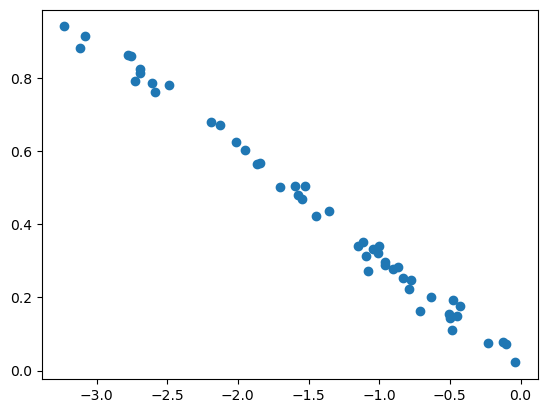

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[ 0.2586,  0.4985,  0.0181,  ...,  0.3358,  0.3461,  0.5531],
        [ 0.2535,  0.4815,  0.0307,  ...,  0.2910,  0.3324,  0.5267],
        [ 0.1625,  0.3111,  0.0095,  ...,  0.1664,  0.2346,  0.3410],
        ...,
        [ 0.1098,  0.1431, -0.0029,  ...,  0.0195,  0.1382,  0.1557],
        [ 0.2888,  0.4584, -0.0421,  ...,  0.3238,  0.3380,  0.5422],
        [ 0.2119,  0.5369,  0.0554,  ...,  0.1969,  0.4205,  0.5546]])

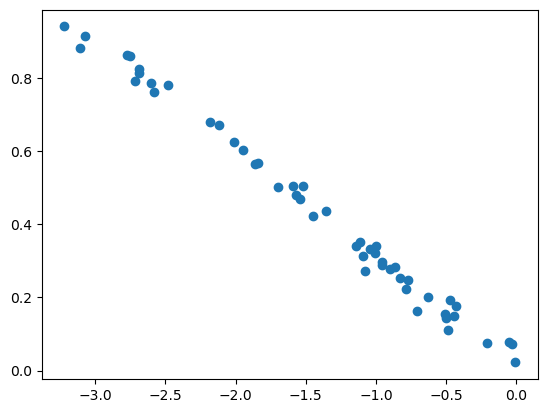

In [8]:
plt.scatter( mycebmf.L[:,0],u)

Converged after 55 iterations.
5


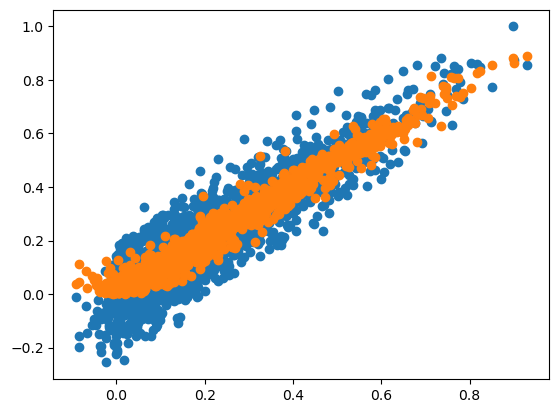

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf=  cEBMF(data= noisy_matrix) 
mycebmf.initialize()

In [11]:
mycebmf.fit()

5
Converged after 55 iterations.
5
Converged after 56 iterations.
Converged after 73 iterations.
Converged after 54 iterations.
4
2
Converged after 67 iterations.
Converged after 54 iterations.
2


CEBMFResult(L=tensor([[-2.7368],
        [-2.5912],
        [-1.6906],
        [-0.0438],
        [-1.5624],
        [-1.9350],
        [-1.5139],
        [-0.1819],
        [-1.5862],
        [-1.0033],
        [-1.4406],
        [-0.8257],
        [-0.7684],
        [-3.0942],
        [-0.8937],
        [-0.0309],
        [-1.9992],
        [-0.4952],
        [-2.7049],
        [-2.6706],
        [-1.1406],
        [-0.8609],
        [-1.1059],
        [-0.4436],
        [-0.4820],
        [-2.4675],
        [-3.2045],
        [-2.5676],
        [-0.9519],
        [-2.1093],
        [-0.0075],
        [-0.9940],
        [-1.5374],
        [-1.8527],
        [-0.6247],
        [-0.9510],
        [-1.0714],
        [-3.0562],
        [-0.7057],
        [-1.0362],
        [-1.8292],
        [-0.4711],
        [-1.3483],
        [-0.5058],
        [-2.1746],
        [-1.0864],
        [-0.4249],
        [-0.7821],
        [-2.6730],
        [-2.7559]]), F=tensor([[-0.0947],
        [-0.1

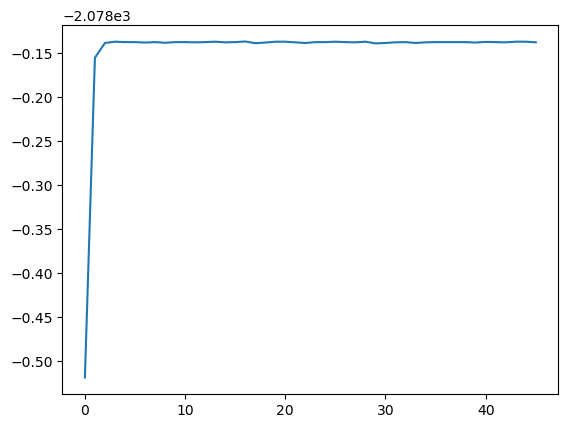

In [12]:
plt.plot(mycebmf.obj)

tensor(0.0067, dtype=torch.float64)

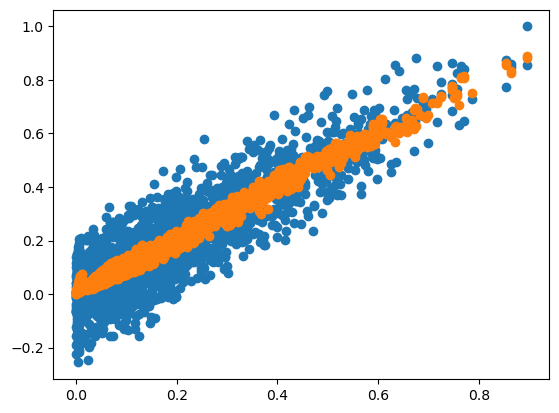

In [13]:
mycebmf.update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix) 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
5
Converged after 57 iterations.
Converged after 66 iterations.
Converged after 54 iterations.
Converged after 55 iterations.
5
Converged after 56 iterations.
2
5
5
Converged after 56 iterations.
Converged after 56 iterations.
5
Converged after 67 iterations.
Converged after 54 iterations.
3
Converged after 68 iterations.
Converged after 54 iterations.
2
5
Converged after 56 iterations.
5
Converged after 67 iterations.
Converged after 54 iterations.
Converged after 67 iterations.
Converged after 54 iterations.
4
Converged after 67 iterations.
Converged after 54 iterations.
2
5
Converged after 56 iterations.
Converged after 55 iterations.
5
Converged after 60 iterations.
3
Converged after 55 iterations.
2
5
Converged after 56 iterations.
5
Converged after 68 iterations.
Converged after 54 iterations.
4
Converged after 68 iterations.
Converged after 54 iterations.
3
2
Converged after 66 iterations.
Converged after 54 iterations.
2
5
5
Converged after 67 iterations.
Converged after 54 i

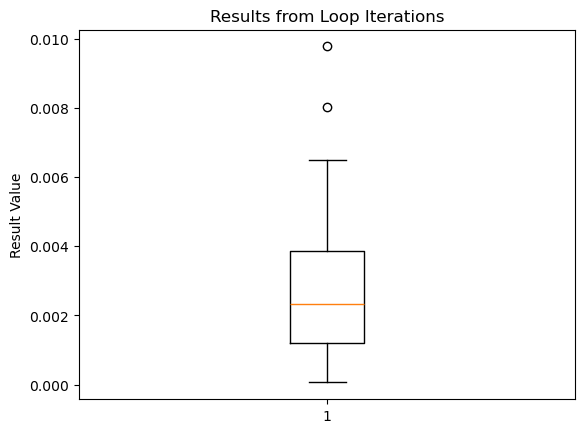

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.002615278465597284